In [1]:
%matplotlib widget

import os
import sys
import matplotlib.pyplot as plt
from IPython import embed
import pickle

sys.path.append(os.path.abspath("/develop/code/evaluation"))
import evaluation_3 as eval

path_results = "/develop/results/spie_journal_2023"
colors = ['darkgreen','purple','#4e88d9'] 

Using MPI version 4.0, 1 processes


Global seed set to 1337


In [2]:
exp_name = "phase_test" # 0. phase | 1. curv | 2. recon/thermo | 3. phase/thermo 

folder_name = exp_name
index = 0

encoder_train = pickle.load(open(os.path.join(path_results, folder_name, "train_info", "encoder.pkl"), "rb"))
recon_train = pickle.load(open(os.path.join(path_results, folder_name, "train_info", "recon.pkl"), "rb"))

encoder_valid =pickle.load(open(os.path.join(path_results, folder_name, "valid_info", "encoder.pkl"), "rb"))
recon_valid = pickle.load(open(os.path.join(path_results, folder_name, "valid_info", "recon.pkl"), "rb"))

#folder_name = exp_name + "_2"
# results of resim
# resim_train_results = pickle.load(open(os.path.join(path_results, folder_name, "train_info", f"sample_{index}.pkl"), "rb"))
# resim_valid_results = pickle.load(open(os.path.join(path_results, folder_name, "valid_info", f"sample_{index}.pkl"), "rb"))

# outputs from the model
resim_train_eval = pickle.load(open(os.path.join(path_results, folder_name, "train_info", "resim.pkl"), "rb"))
resim_valid_eval = pickle.load(open(os.path.join(path_results, folder_name, "valid_info", "resim.pkl"), "rb"))

loss = eval.gather_loss(os.path.join(path_results,folder_name))
#eval.plot_loss(loss['loss'], loss['loss'], loss['loss'], loss['loss'], "at training end")

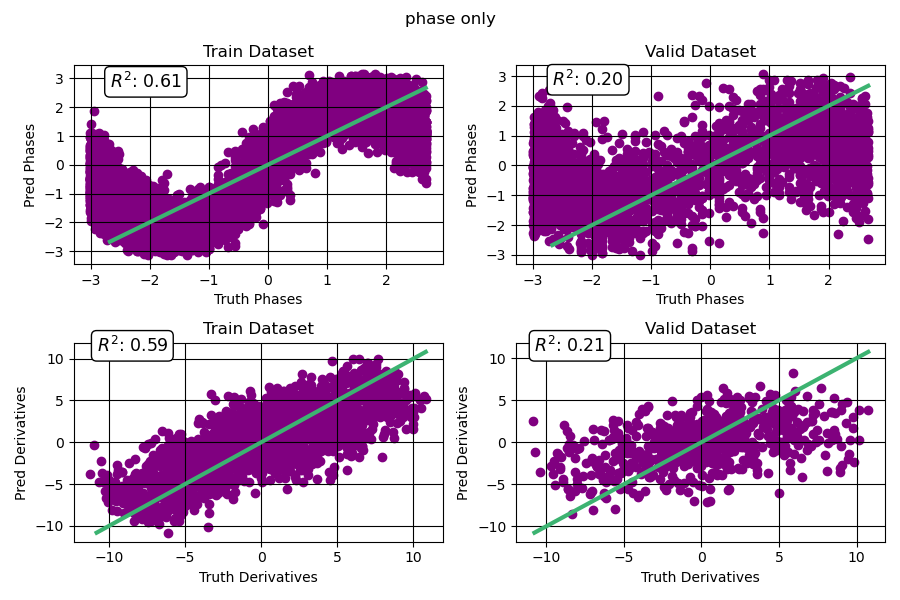

In [3]:
phase_train_truth, phase_train_pred = encoder_train['phase_truth'].flatten(), encoder_train['phase_pred'].flatten()
phase_valid_truth, phase_valid_pred = encoder_valid['phase_truth'].flatten(), encoder_valid['phase_pred'].flatten()
der_train_truth, der_train_pred = encoder_train['deriv_truth'].flatten(), encoder_train['deriv_pred'].flatten()
der_valid_truth, der_valid_pred = encoder_valid['deriv_truth'].flatten(), encoder_valid['deriv_pred'].flatten()
int_train_truth, int_train_pred = encoder_train['intensity_truth'].flatten(), encoder_train['intensity_pred'].flatten()

plt.close("all")
title = "phase only"
eval.regression_plots(title, phase_train_truth, phase_train_pred, phase_valid_truth, phase_valid_pred, der_train_truth, der_train_pred, der_valid_truth, der_valid_pred, save_fig=False)

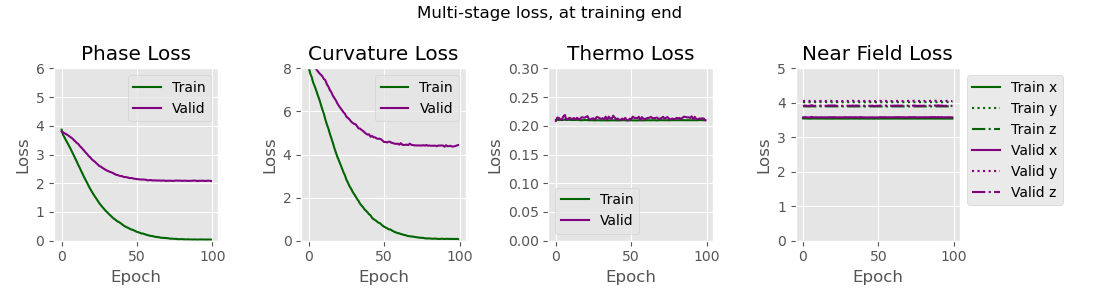

In [19]:
exp_name = "phase_test_no_constraint_100epoch" # 0. phase | 1. curv | 2. recon/thermo | 3. phase/thermo 

folder_name = exp_name
index = 0

encoder_train = pickle.load(open(os.path.join(path_results, folder_name, "train_info", "encoder.pkl"), "rb"))
recon_train = pickle.load(open(os.path.join(path_results, folder_name, "train_info", "recon.pkl"), "rb"))

encoder_valid =pickle.load(open(os.path.join(path_results, folder_name, "valid_info", "encoder.pkl"), "rb"))
recon_valid = pickle.load(open(os.path.join(path_results, folder_name, "valid_info", "recon.pkl"), "rb"))

resim_train_eval = pickle.load(open(os.path.join(path_results, folder_name, "train_info", "resim.pkl"), "rb"))
resim_valid_eval = pickle.load(open(os.path.join(path_results, folder_name, "valid_info", "resim.pkl"), "rb"))

loss = eval.gather_loss(os.path.join(path_results,folder_name))

eval.plot_loss(loss['loss'], loss['loss'], loss['loss'], loss['loss'], "at training end")

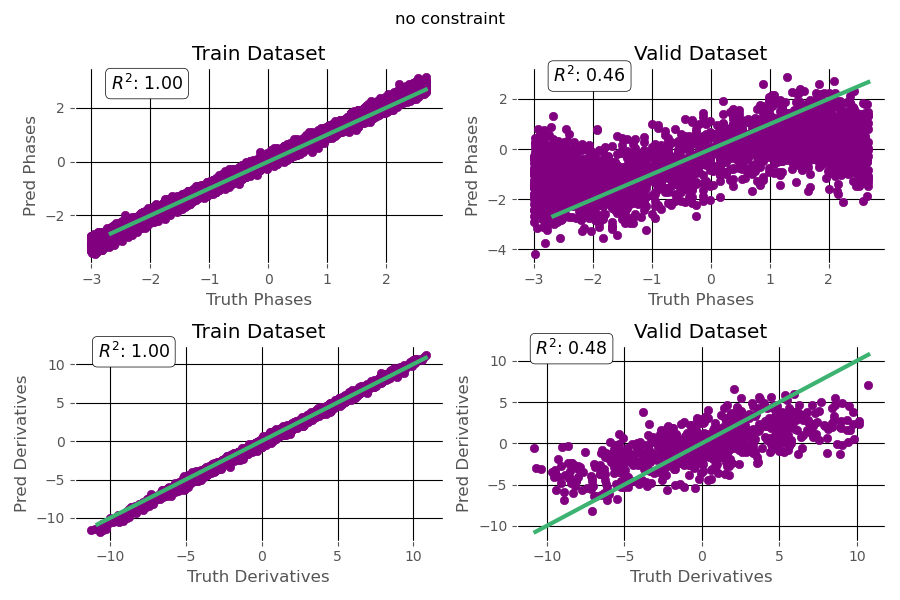

In [20]:
phase_train_truth, phase_train_pred = encoder_train['phase_truth'].flatten(), encoder_train['phase_pred'].flatten()
phase_valid_truth, phase_valid_pred = encoder_valid['phase_truth'].flatten(), encoder_valid['phase_pred'].flatten()
der_train_truth, der_train_pred = encoder_train['deriv_truth'].flatten(), encoder_train['deriv_pred'].flatten()
der_valid_truth, der_valid_pred = encoder_valid['deriv_truth'].flatten(), encoder_valid['deriv_pred'].flatten()
int_train_truth, int_train_pred = encoder_train['intensity_truth'].flatten(), encoder_train['intensity_pred'].flatten()

plt.close("all")
title = "no constraint"
eval.regression_plots(title, phase_train_truth, phase_train_pred, phase_valid_truth, phase_valid_pred, der_train_truth, der_train_pred, der_valid_truth, der_valid_pred)

In [21]:
print(len(phase_train_truth))
print(len(phase_train_pred))

10404
10404


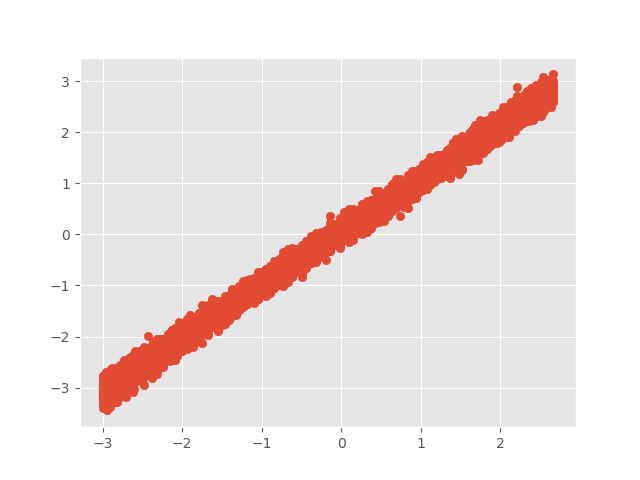

In [22]:
plt.close("all")

fig, ax = plt.subplots()
ax.scatter(phase_train_truth, phase_train_pred)

In [54]:
plt.close("all")
import numpy as np

def constrain_0(value):
    return np.clip(value, -np.pi, np.pi)

def constrain_1(value):
    min = -np.pi
    max = np.pi
    temp = np.sin(value)
    scaled_value = (temp + 1) * (max - min) / 2 + min
    return scaled_value
    
def testing(truth, pred, target):
    fig, ax = plt.subplots()
    ax.set_title(target)
    #truth = np.sin(truth)
    #pred = np.sin(pred)
    ax.scatter(truth, pred, label = "unconstrained")

    _truth = constrain_1(truth)
    _pred = constrain_1(pred)
    ax.scatter(_truth, _pred, label = "constrained")
    ax.legend()

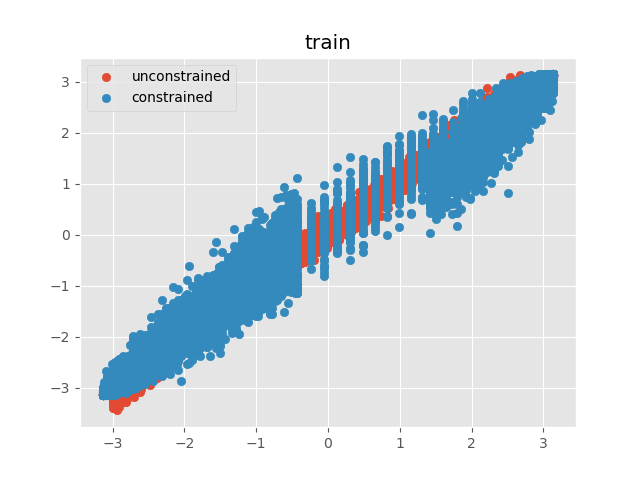

In [55]:
testing(phase_train_truth, phase_train_pred, target = "train")

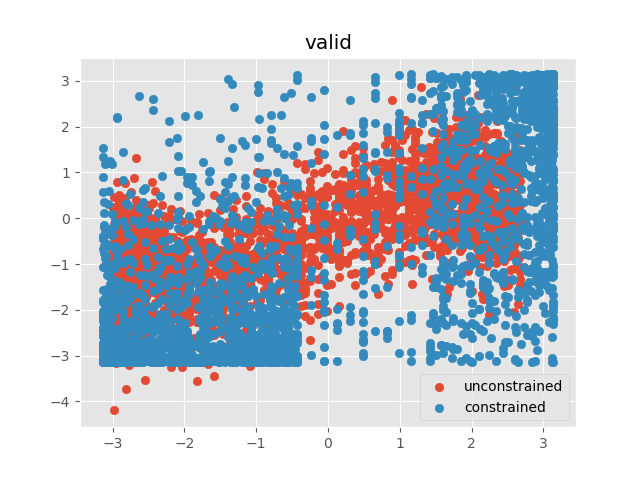

In [56]:
testing(phase_valid_truth, phase_valid_pred, target = "valid")